In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score
import keras
import matplotlib.font_manager
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from utils.evaluation import *
from utils.utils import read_dataset,split_dataset
%matplotlib inline

In [3]:
data,labels = read_dataset('data/mitbih_train.csv','MIT-BIH')

In [4]:
xtrain,ytrain,xval,yval,xtest,ytest,y_true = split_dataset(data,labels,'MIT-BIH')

In [5]:
from models.mlp import Classifier_MLP

In [6]:
mlp = Classifier_MLP(output_directory='../outputs/',input_shape=(data.shape[1],),nb_classes = 5,verbose=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187)]             0         
_________________________________________________________________
flatten (Flatten)            (None, 187)               0         
_________________________________________________________________
dropout (Dropout)            (None, 187)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               94000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0     

Train on 52532 samples, validate on 17511 samples
Epoch 1/2
52532/52532 [==============================] - 8s 161us/sample - loss: 0.8474 - accuracy: 0.8277 - val_loss: 0.8081 - val_accuracy: 0.8277
Epoch 2/2
52532/52532 [==============================] - 8s 159us/sample - loss: 0.8030 - accuracy: 0.8277 - val_loss: 0.7674 - val_accuracy: 0.8277


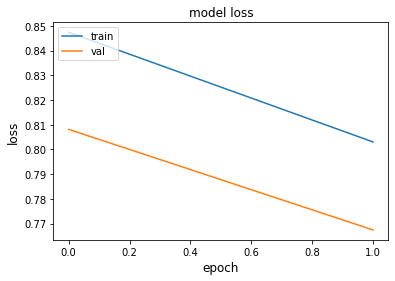

In [9]:
hist = mlp.fit(xtrain,ytrain,xval,yval,y_true,batch_size=64,nb_epochs=2)

In [10]:
ypred = mlp.predict(xval,np.argmax(yval,axis=1),return_df_metrics=False)
ypred = np.argmax(ypred,axis=1)
evaluate(y_true,ypred)

,accuracy,recall,precision,f1-score
0,0.827708,0.2,0.165542,0.181147


In [11]:
get_binary_metrics(y_true,ypred)

,recall,precision,f1-score
0,1,0.827708,0.905733
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
